In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib import colors

import plot_connect as vpc
import plot_PLSC as vpp

import sys
import os.path as op

from scipy import stats

import nilearn as nil

path_to_mri = op.abspath('../')

sys.path.append(path_to_mri)

#import Analysis.CAPs as caps
import Analysis.funconn as mystats
import Utility.fmri_utils as futil

import importlib

/home/acionca/miniconda3/envs/STD/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [4]:
importlib.reload(vpp)

#to_plot, atlas_labels = vpp.plot_imaging("Fatigue_BP_Obj_GRP", "D:\cioncaa\Documents\MATLAB\myPLS",
#                                            LC_id=1, threshold=0, by_network=True, cmap = 'turbo')
                                            
#to_plot, atlas_labels = vpp.plot_imaging("Fatigue_BP_Obj_mac_GRP", "/Users/AlexCionca/Documents/MATLAB/myPLS/",
#    path_to_atlas = "/Users/AlexCionca/Documents/_HUG/Data/Parcellations/Custom_Yeo_WholeBrain",
#    LC_id=1, threshold=0, by_network=True, cmap = 'turbo')

#to_plot, atlas_labels = vpp.plot_imaging("Fatigue_BP_Obj_mac_GRP", "/mnt/d/Data/MATLAB/myPLS/",
#    path_to_atlas = "/mnt/d/Data/CovidCog/Parcellations/Custom_Yeo_WholeBrain",
#    LC_id=1, threshold=0, by_network=True, cmap = 'turbo')

path_to_atlas = "/mnt/d/Data/CovidCog/Parcellations/Custom_Yeo_WholeBrain/"
path_to_mypls = "/mnt/d/Data/MATLAB/myPLS"
path_to_results = '/mnt/h/My Drive/_Work/HUG/Data/Results'

#path_to_atlas = "D:\cioncaa\Documents\Parcellations\Custom_Yeo_WholeBrain"
#path_to_mypls = "D:\cioncaa\Documents\MATLAB\myPLS"
#path_to_results = 'G:\Mon Drive\_Work\HUG\Data\Results'

results_study = 'Emo_PLSC'

study = "Emo-rev_1-wcov3-wmemo1_GRP"
#study = "Emo_moderate"
#study = "Immuno_mem"

File not found with specified normalization. Trying 1 instead.


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/mnt/d/Data/MATLAB/myPLS/Emo-rev_1-wcov3-wmemo1_GRP/myPLS_behavior_norm1-1_res.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

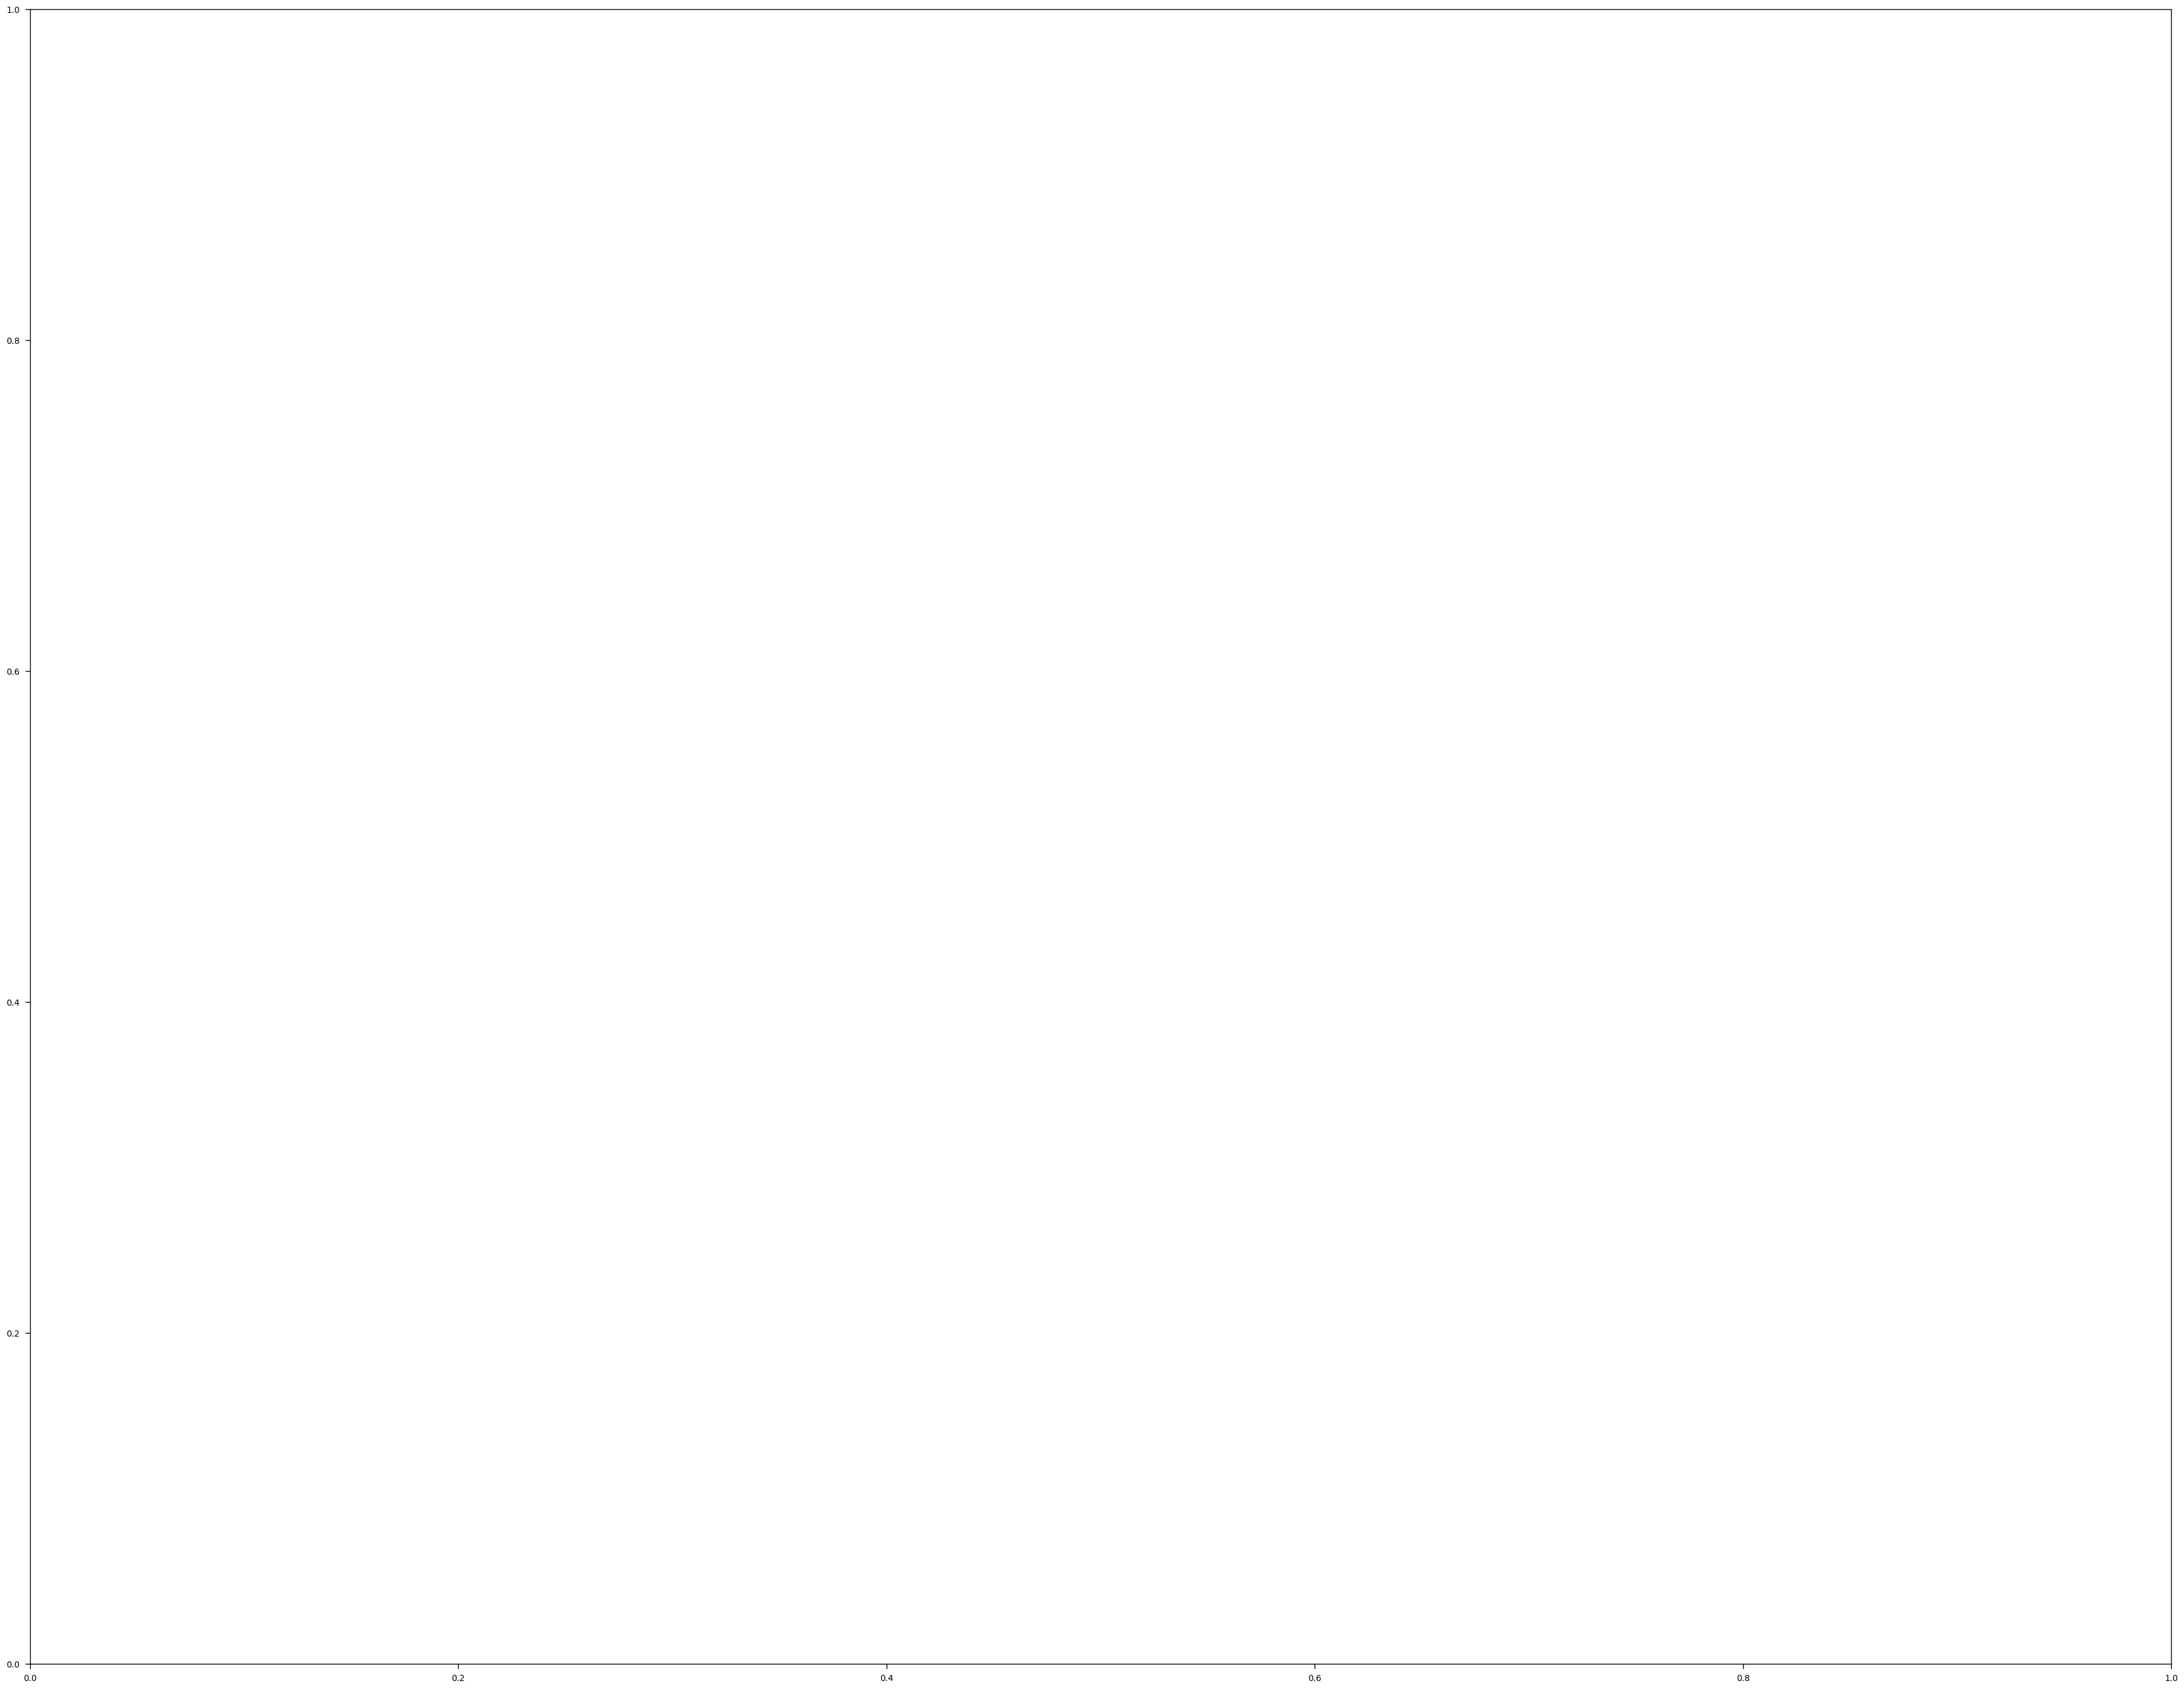

In [5]:
thresh = 0


#my_roi = np.genfromtxt('G:\Mon Drive\_Work\HUG\Data\Results\Severity_Scrubbed_BP\merged_roi-v2_FIXED.txt').astype(int)
#my_roi

to_plot, atlas_labels = vpp.plot_imaging(study, path_to_mypls, path_to_atlas = path_to_atlas,
    LC_id=0, threshold=thresh, by_network=True, cmap = 'turbo')#, fontsize_overwrite = 35)

#plt.savefig(f'{path_to_results}/{study}-ImgBSR_Heat{thresh}.png')
#plt.savefig('G:\Mon Drive\_Work\HUG\Data\Results\Emo_PLSC\Emo_BP_Rerun-ImgBSR_Heat0.png')

In [10]:
def bootstrap_percentile(data, n = 10000, perc = 95, ci = 95):
    resample = np.random.choice(data, size = (data.shape[0], n), replace = True)
    percentile = np.percentile(resample, q = perc, axis = 1, interpolation = 'nearest')
    conf_intervals = np.percentile(percentile, q = [100-ci, ci], interpolation = 'nearest')
    return percentile.mean(), conf_intervals

bootstrap_percentile(np.arange(20))

C:\Users\cioncaa\AppData\Local\Temp\ipykernel_19476\1896379406.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  percentile = np.percentile(resample, q = perc, axis = 1, interpolation = 'nearest')
C:\Users\cioncaa\AppData\Local\Temp\ipykernel_19476\1896379406.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  conf_intervals = np.percentile(percentile, q = [100-ci, ci], interpolation = 'nearest')


(18.4, array([18, 19]))

In [11]:
to_circus = to_plot.copy()
atlas_to_circus = atlas_labels.copy()
#to_circus = extended_BSR.copy()

perc_thresh = 1

mythresh = 3
num_val = 1000

if perc_thresh:
    triu_idx = np.triu_indices_from(to_plot, k = 1)
    lined = to_plot[triu_idx]
    #percentile_thresh = np.percentile(to_circus[to_circus > 0], 100-perc_thresh, method = 'nearest')
    #percentile_thresh = np.percentile(to_circus[to_circus > 0], 100-perc_thresh, interpolation = 'nearest')
    percentile_thresh, ci = bootstrap_percentile(lined[lined > 0], perc = 100 - perc_thresh)
    to_circus[(to_circus < percentile_thresh) & (to_circus > 0)] = 0

    print(ci)
    print(percentile_thresh)
    
    #percentile_thresh = np.percentile(to_circus[to_circus > 0], 100-perc_thresh, method = 'nearest')
    #percentile_thresh = np.percentile(to_circus[to_circus > 0], 100-perc_thresh, interpolation = 'nearest')
    percentile_thresh, ci = bootstrap_percentile(lined[lined < 0], perc = perc_thresh)
    to_circus[(to_circus > percentile_thresh) & (to_circus < 0)] = 0
    
    print(ci)
    print(percentile_thresh)
else:
    to_circus[np.abs(to_circus) < mythresh] = 0

ASCEND = False

stronger_fc = vpp.get_stronger_fc(to_circus, atlas_to_circus, n_val=num_val, use_abs=False, ascending = ASCEND)
#stronger_fc.to_csv(op.join(path_to_results, f'{study}_stronger_fc'+ASCEND*'_NEG'+'.csv'))
stronger_fc.head(20)

C:\Users\cioncaa\AppData\Local\Temp\ipykernel_19476\1896379406.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  percentile = np.percentile(resample, q = perc, axis = 1, interpolation = 'nearest')
C:\Users\cioncaa\AppData\Local\Temp\ipykernel_19476\1896379406.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  conf_intervals = np.percentile(percentile, q = [100-ci, ci], interpolation = 'nearest')


[6.09575253 6.2660118 ]
6.189456016467203
[-3.15050718 -2.95159867]
-3.0434209439979893


,net_from,reg_from,net_to,reg_to,score
93,DefaultA,pCunPCC_1,Subcortical,globus_pallidus_externa,9.275805
100,DefaultA,pCunPCC_1,Subcortical,globus_pallidus_externa,8.344844
70,ContB,IPL_1,DefaultA,PFCm_1,8.338094
114,Cereb,Vermis_X,Subcortical,globus_pallidus_externa,8.299522
72,ContB,IPL_1,DefaultB,PFCd_1,7.791198
60,LimbicA,TempPole_1,DefaultC,Rsp_1,7.74015
30,DorsAttnA,TempOcc_1,ContB,PFCld_1,7.714381
88,ContC,pCun_1,DefaultA,PFCm_1,7.693945
74,ContB,PFClv_1,Cereb,VIIIb,7.690086
50,SalVentAttnB,PFCl_1,Cereb,Vermis_CrusI,7.628385


In [12]:

stronger_fc = vpp.get_stronger_fc(to_circus, atlas_labels, n_val=num_val, use_abs=True, ascending = False)
print(stronger_fc)

#plt.savefig(f'{path_to_results}/{study}-ImgBSR_Heat{thresh}.png')
#stronger_fc.to_csv(f'{path_to_results}/{study}-stronger_pos_{num_val}.csv')
#stronger_fc.to_csv('G:\Mon Drive\_Work\HUG\Data\Results\Emo_PLSC\stronger_15.csv')

#stronger_fc = vpp.get_stronger_fc(to_circus, atlas_labels, n_val=num_val, use_abs=False)
#print(stronger_fc)

#plt.savefig(f'{path_to_results}/{study}-ImgBSR_Heat{thresh}.png')
#stronger_fc.to_csv(f'{path_to_results}/{study}-stronger_neg_{num_val}.csv')

     net_from   reg_from       net_to                   reg_to     score
93   DefaultA  pCunPCC_1  Subcortical  globus_pallidus_externa  9.275805
100  DefaultA  pCunPCC_1  Subcortical  globus_pallidus_externa  8.344844
70      ContB      IPL_1     DefaultA                   PFCm_1  8.338094
114     Cereb   Vermis_X  Subcortical  globus_pallidus_externa  8.299522
72      ContB      IPL_1     DefaultB                   PFCd_1  7.791198
..        ...        ...          ...                      ...       ...
13    VisPeri  StriCal_1        Cereb                    CrusI -3.178632
9     VisPeri  StriCal_1        Cereb                  Dentate -3.177456
3     VisPeri  StriCal_1        Cereb                  Dentate -3.172713
1     VisCent  Striate_1        Cereb                       VI -3.150507
11    VisPeri  StriCal_1        Cereb                       VI -3.137523

[121 rows x 5 columns]


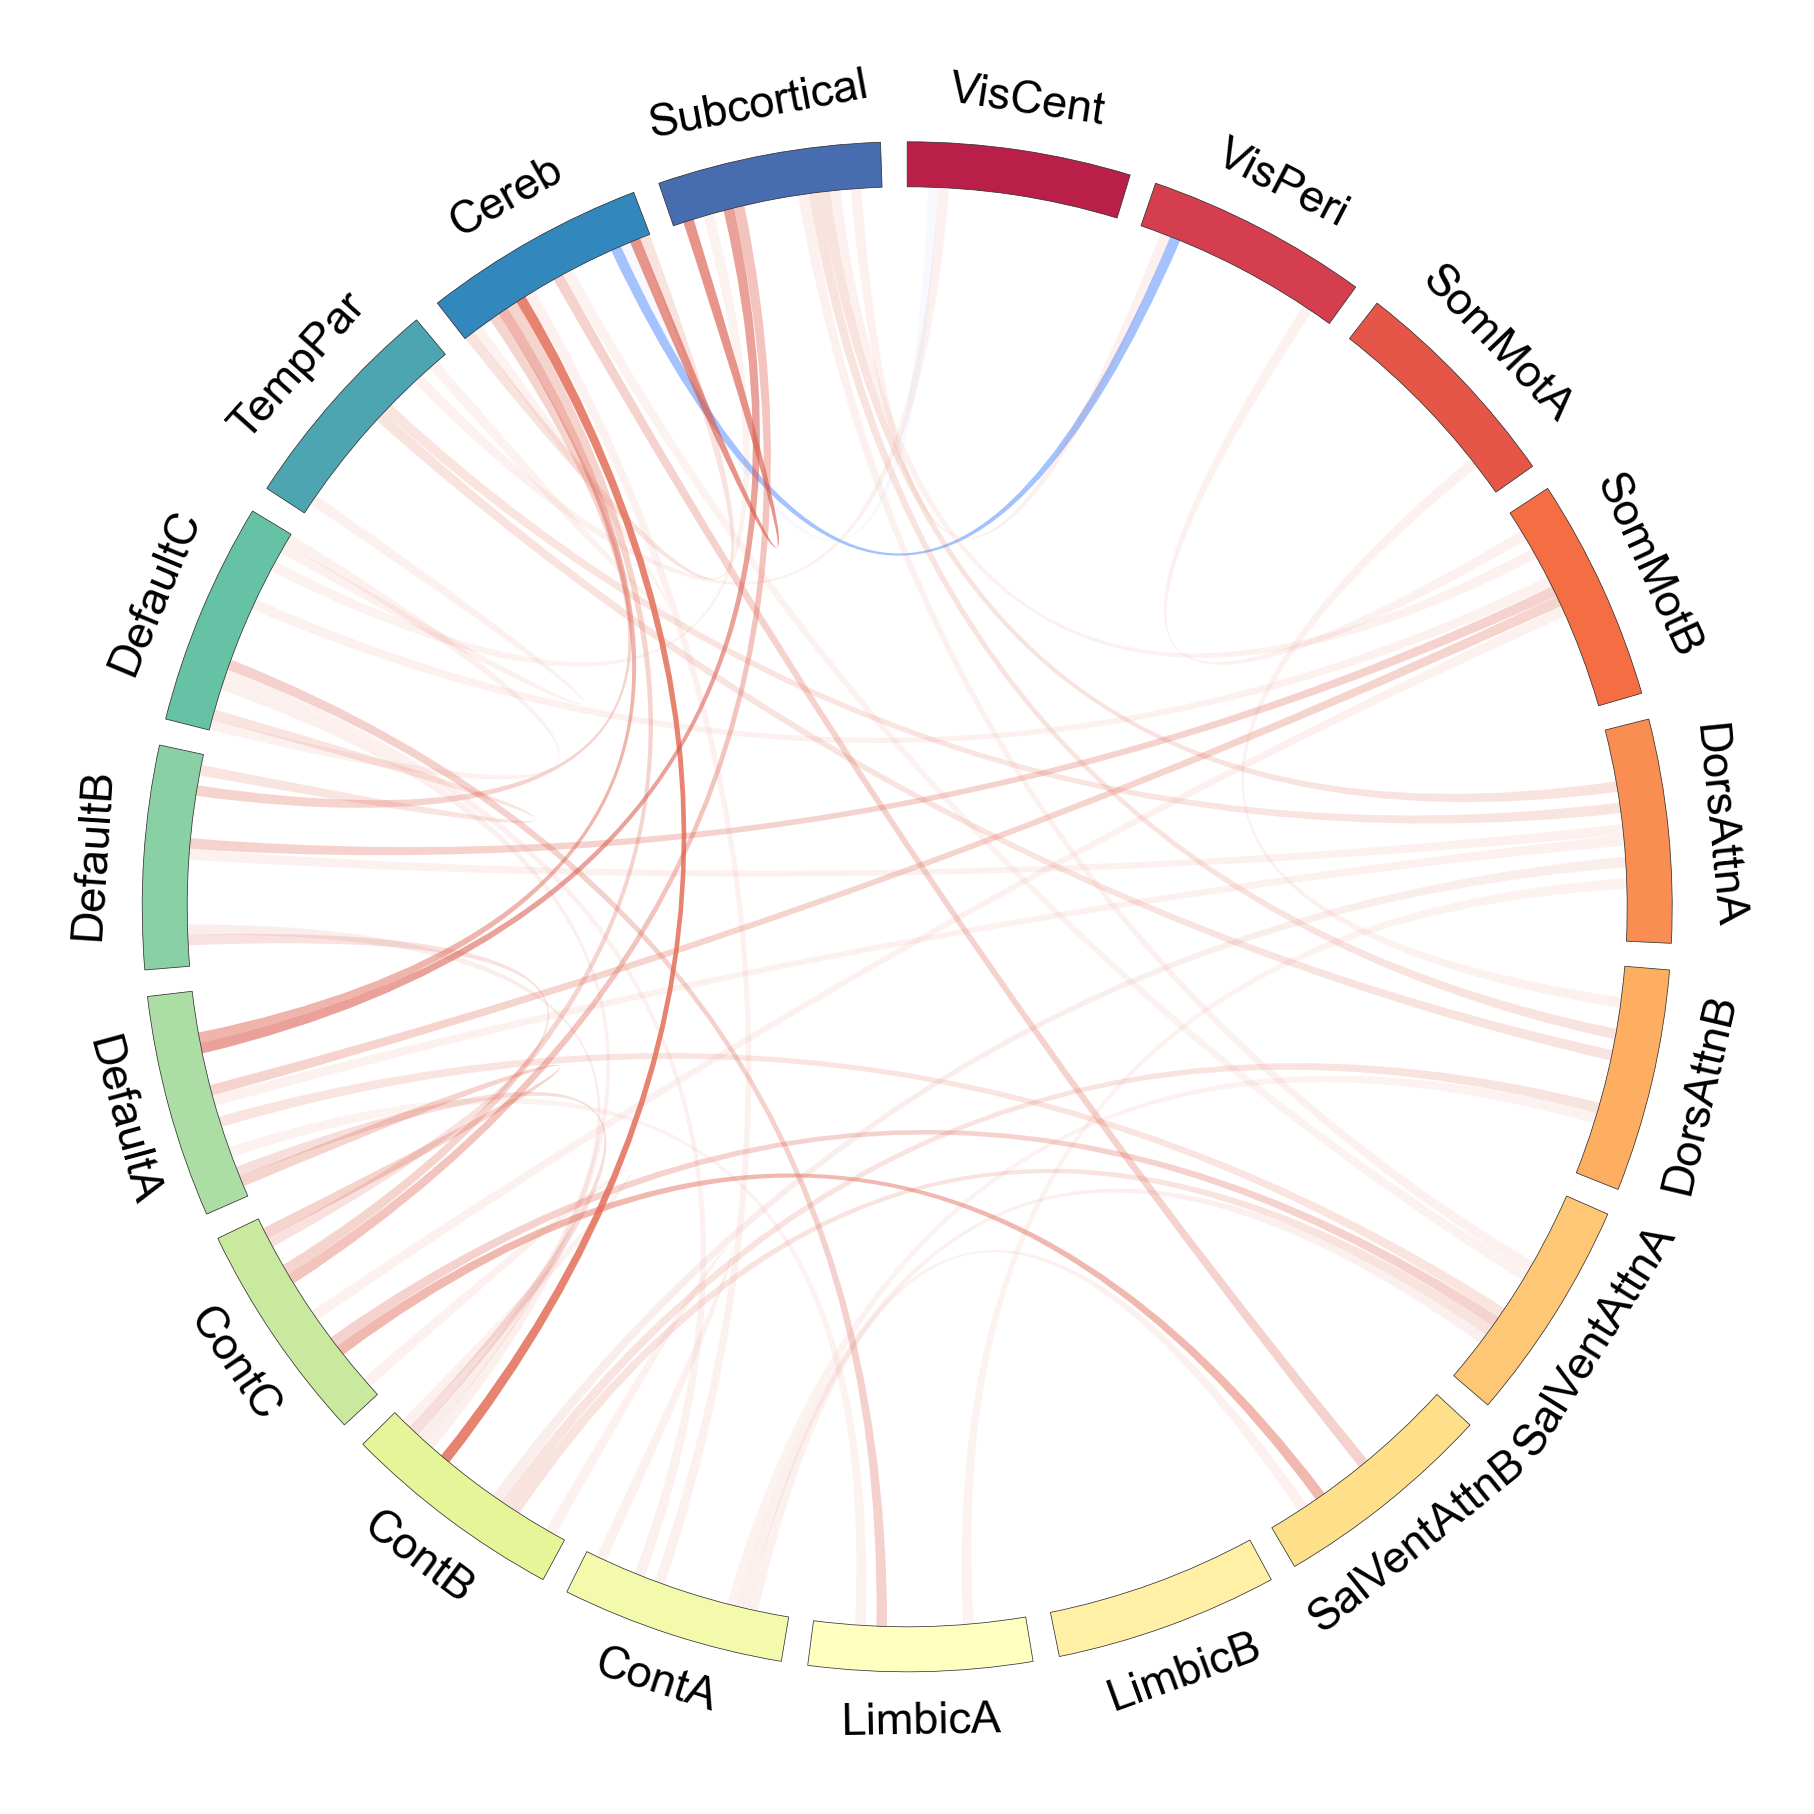

In [26]:

importlib.reload(vpp)

#fig = plt.figure(figsize = (5, 5), frameon=False)

#vpp.plot_circus(to_circus, atlas_labels, figsize = (20, 20), net_visualize = True)
vpp.plot_circus(to_circus, atlas_to_circus, figsize=(25, 25), net_visualize=True, label_size=45)

#stronger_fc.to_csv(op.join(path_to_results, results_study, f'{study}_stronger_fc'+ASCEND*'_NEG'+'.csv'))
plt.savefig(op.join(path_to_results, results_study, f'{study}-ImgBSR_Circ{perc_thresh}-HERE.png'))
#plt.savefig('G:\Mon Drive\_Work\HUG\Data\Results\Emo_PLSC\Emo_BP_Rerus-ImgBSR_Circ4.png')


In [46]:
sum(to_circus.sum(axis = 1) != 0)

importlib.reload(futil)

futil.save_node_edge_files(to_circus, path_to_atlas, saveloc=op.join(path_to_results, 'Emo_PLSC'), study=study)

(87, 87)


,R,A,S,colors,degree,roi_name
2,-27.000000,-95.000000,-4.000000,1,1,VisCent_{ExStr\_2}
3,-5.000000,-92.000000,-2.000000,1,1,VisCent_{Striate\_1}
8,-39.000000,-23.000000,59.000000,2,1,SomMotA_{1}
10,-53.000000,-23.000000,8.000000,3,4,SomMotB_{Aud\_1}
11,-37.000000,-21.000000,16.000000,3,1,SomMotB_{S2\_1}
...,...,...,...,...,...,...
143,-26.269379,1.754882,0.175296,19,3,Subcortical_{putamen}
144,25.229815,1.802066,0.245904,19,1,Subcortical_{putamen}
147,-18.321799,-4.388697,-3.427912,19,2,Subcortical_{globus\_pallidus\_interna}
148,17.419149,-4.881915,-3.512766,19,1,Subcortical_{globus\_pallidus\_Interna}


In [18]:
#study_to_check = ['Immuno_mem', 'Immuno_mem_GRP']
# Emo-rev_1-wmemo-wcov3_GRP
#study_to_check = ['Emo-rev_1-wcov3_GRP', 'Emo-rev_1-wcov3_moderate']
#study_to_check = ['Emo-rev_1-wcov3-wmemo1_GRP', 'Emo-rev_1-wcov3-wmemo1_moderate']
study_to_check = ['Emo-rev_1-wcov3-wmemo1_GRP', 'Emo-rev_1-wcov3_GRP']

n_study = len(study_to_check)

BSR_data = np.empty((n_study, 156, 156))

for i, study in enumerate(study_to_check):
    plsc_data = vpp.load_PLSC_image(study, path_to_mypls, LC_id=0, results="BSR")
    #to_plot, atlas_labels = vpp.plot_imaging(study, path_to_mypls, path_to_atlas = path_to_atlas,
    #    LC_id=0, threshold=0, by_network=True, cmap = 'turbo')

    atlas_labels = futil.get_atlas_labels(path_to_atlas, filters = "all")

    atlas_labels, sorting_array = futil.sort_atlas_labels(atlas_labels)
    plsc_data = plsc_data[sorting_array][:, sorting_array]

    BSR_data[i] = plsc_data

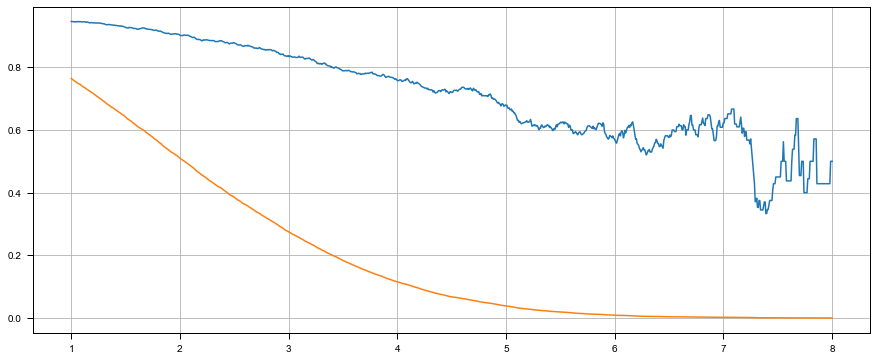

In [19]:
z_thresholds = np.linspace(1, 8, 1000)
prop_overlap = np.zeros_like(z_thresholds)
prop_surviving = np.zeros_like(prop_overlap)

perc_thresh = 1

for z_i, z_thresh in enumerate(z_thresholds):
    thresholded = BSR_data.copy()
    thresholded[np.abs(thresholded) < z_thresh] = 0

    is_in_both = (np.abs(thresholded) > 0).sum(axis = 0)
    prop_overlap[z_i] = (is_in_both == n_study).sum()/(is_in_both > 0).sum()
    prop_surviving[z_i] = (is_in_both == n_study).sum()/(156**2)

fig, ax = plt.subplots(figsize = (15, 6))
plt.plot(z_thresholds, prop_overlap)
plt.plot(z_thresholds, prop_surviving)
plt.grid()

6.211699498722302


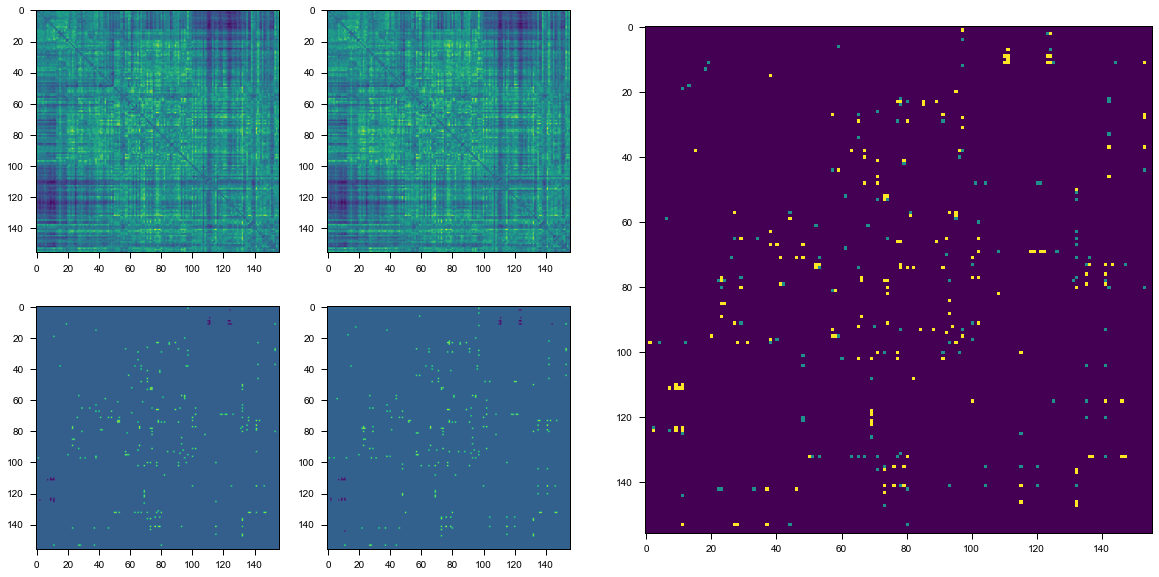

In [20]:
fig, ax = plt.subplots(figsize = (20, 10))
mythresh = 4

perc_thresh = 1

for i in range(2):
    plt.subplot(2, 4, 1+i)
    plt.imshow(BSR_data[i])

thresholded = BSR_data.copy()

if perc_thresh:
    percentile_thresh = np.percentile(thresholded[thresholded > 0], 100-perc_thresh, method = 'nearest')
    thresholded[(thresholded < percentile_thresh) & (thresholded > 0)] = 0

    print(percentile_thresh)
    
    percentile_thresh = np.percentile(thresholded[thresholded < 0], perc_thresh, method = 'nearest')
    thresholded[(thresholded > percentile_thresh) & (thresholded < 0)] = 0
else:
    thresholded[np.abs(thresholded) < mythresh] = 0

for i in range(2):
    plt.subplot(2, 4, 5+i)
    plt.imshow(thresholded[i])

plt.subplot(1, 2, 2)
is_in_both = (thresholded != 0).sum(axis = 0)
plt.imshow(is_in_both)

In [21]:
is_unique_to_pattern = np.logical_and((np.abs(BSR_data) >= mythresh), (is_in_both == 1))

for i, title in enumerate(study_to_check):
    survivors = np.unique(np.where(is_unique_to_pattern[i] != 0)[0])
    to_image = thresholded[i, survivors][:, survivors]
    labels = atlas_labels.iloc[survivors]
    #vpc.heatmap_fc(to_image, labels=labels.roi_name, cmap = 'turbo', sym_cbar=True, title=title)
    #plt.savefig(f'{path_to_results}/Unique_to_pattern_{title}-ImgBSR_Heat{mythresh}.png')

    to_circus = thresholded[i].copy()
    to_circus[~ is_unique_to_pattern[i]] = 0

    print(title)
    stronger_fc = vpp.get_stronger_fc(to_circus, atlas_labels, n_val=num_val, use_abs=True, ascending = False)
    #stronger_fc.to_csv(op.join(path_to_results, results_study, f'Specific_to_{title}_vs_{study_to_check[1-i]}_stronger_fc.csv'))
    #stronger_fc.to_csv(op.join(path_to_results, results_study, f'Specific_to_{title}_stronger_fc.csv'))
    print(stronger_fc[:20])

    #stronger_fc = vpp.get_stronger_fc(to_circus, atlas_labels, n_val=num_val, use_abs=False)
    #print(stronger_fc[:15])

    #vpp.plot_circus(to_circus, atlas_labels, figsize = (20, 20), net_visualize = True)
    #plt.savefig(f'{path_to_results}/Unique_to_pattern_{title}-ImgBSR_Circus{mythresh}.png')

Emo-rev_1-wcov3-wmemo1_GRP
        net_from      reg_from       net_to                   reg_to     score
21      DefaultA        PFCm_1        Cereb             Vermis_CrusI    6.7802
10  SalVentAttnB       PFCmp_1        Cereb             Vermis_CrusI  6.771155
3      DorsAttnB       PostC_3        ContB                  PFCld_1  6.694784
1        SomMotB         Aud_1  Subcortical              hippocampus  6.626689
20         ContC       Cingp_1        Cereb                    VIIIb  6.595115
29         Cereb  Vermis_CrusI  Subcortical  globus_pallidus_externa  6.570415
9   SalVentAttnB       PFCmp_1        ContC                   pCun_1  6.450738
16         ContB        Temp_1        Cereb             Vermis_CrusI  6.444781
13         ContA        PFCl_1        Cereb             Vermis_CrusI  6.424418
11         ContA        PFCl_2     DefaultC                    Rsp_1    6.4234
7   SalVentAttnB        PFCl_1        ContA                    IPS_1  6.423054
14         ContB       PF

In [22]:
#overlap = is_in_both.copy()
#overlap = to_plot.copy()
overlap = BSR_data.mean(axis = 0)

overlap[is_in_both < 2] = 0
survivors = np.unique(np.where(overlap != 0)[0])
to_image = overlap[survivors][:, survivors]
labels = atlas_labels.iloc[survivors]

ASCEND = False

stronger_fc = vpp.get_stronger_fc(overlap, atlas_to_circus, n_val=num_val, use_abs=True, ascending = ASCEND)
stronger_fc.to_csv(op.join(path_to_results, results_study, f'Overlap_{study_to_check[0]}-{study_to_check[1]}_stronger_fc.csv'))
#stronger_fc.to_csv(op.join(path_to_results, f'Overlap_stronger_fc'+ASCEND*'_NEG'+'.csv'))
stronger_fc.head(31)

#vpc.heatmap_fc(to_image, labels=labels.roi_name, cmap = 'turbo', sym_cbar=True)
#vpc.heatmap_fc(to_image, labels=labels.roi_name, cmap = 'YlOrRd_r', sym_cbar=False)
#plt.savefig(op.join(path_to_results, f'Overlap-ImgBSR_Heat{perc_thresh}.png'))

,net_from,reg_from,net_to,reg_to,score
69,DefaultA,pCunPCC_1,Subcortical,globus_pallidus_externa,9.264846
82,Cereb,Vermis_X,Subcortical,globus_pallidus_externa,8.645259
51,ContB,IPL_1,DefaultA,PFCm_1,8.388282
73,DefaultA,pCunPCC_1,Subcortical,globus_pallidus_externa,8.101046
54,ContB,PFClv_1,Cereb,VIIIb,7.848547
64,ContC,pCun_1,DefaultA,PFCm_1,7.762153
46,LimbicA,TempPole_1,DefaultC,Rsp_1,7.757722
61,ContC,Cingp_1,Subcortical,thalamus,7.703903
25,DorsAttnA,TempOcc_1,ContB,PFCld_1,7.633169
22,DorsAttnA,SPL_1,Subcortical,amygdala,7.627264


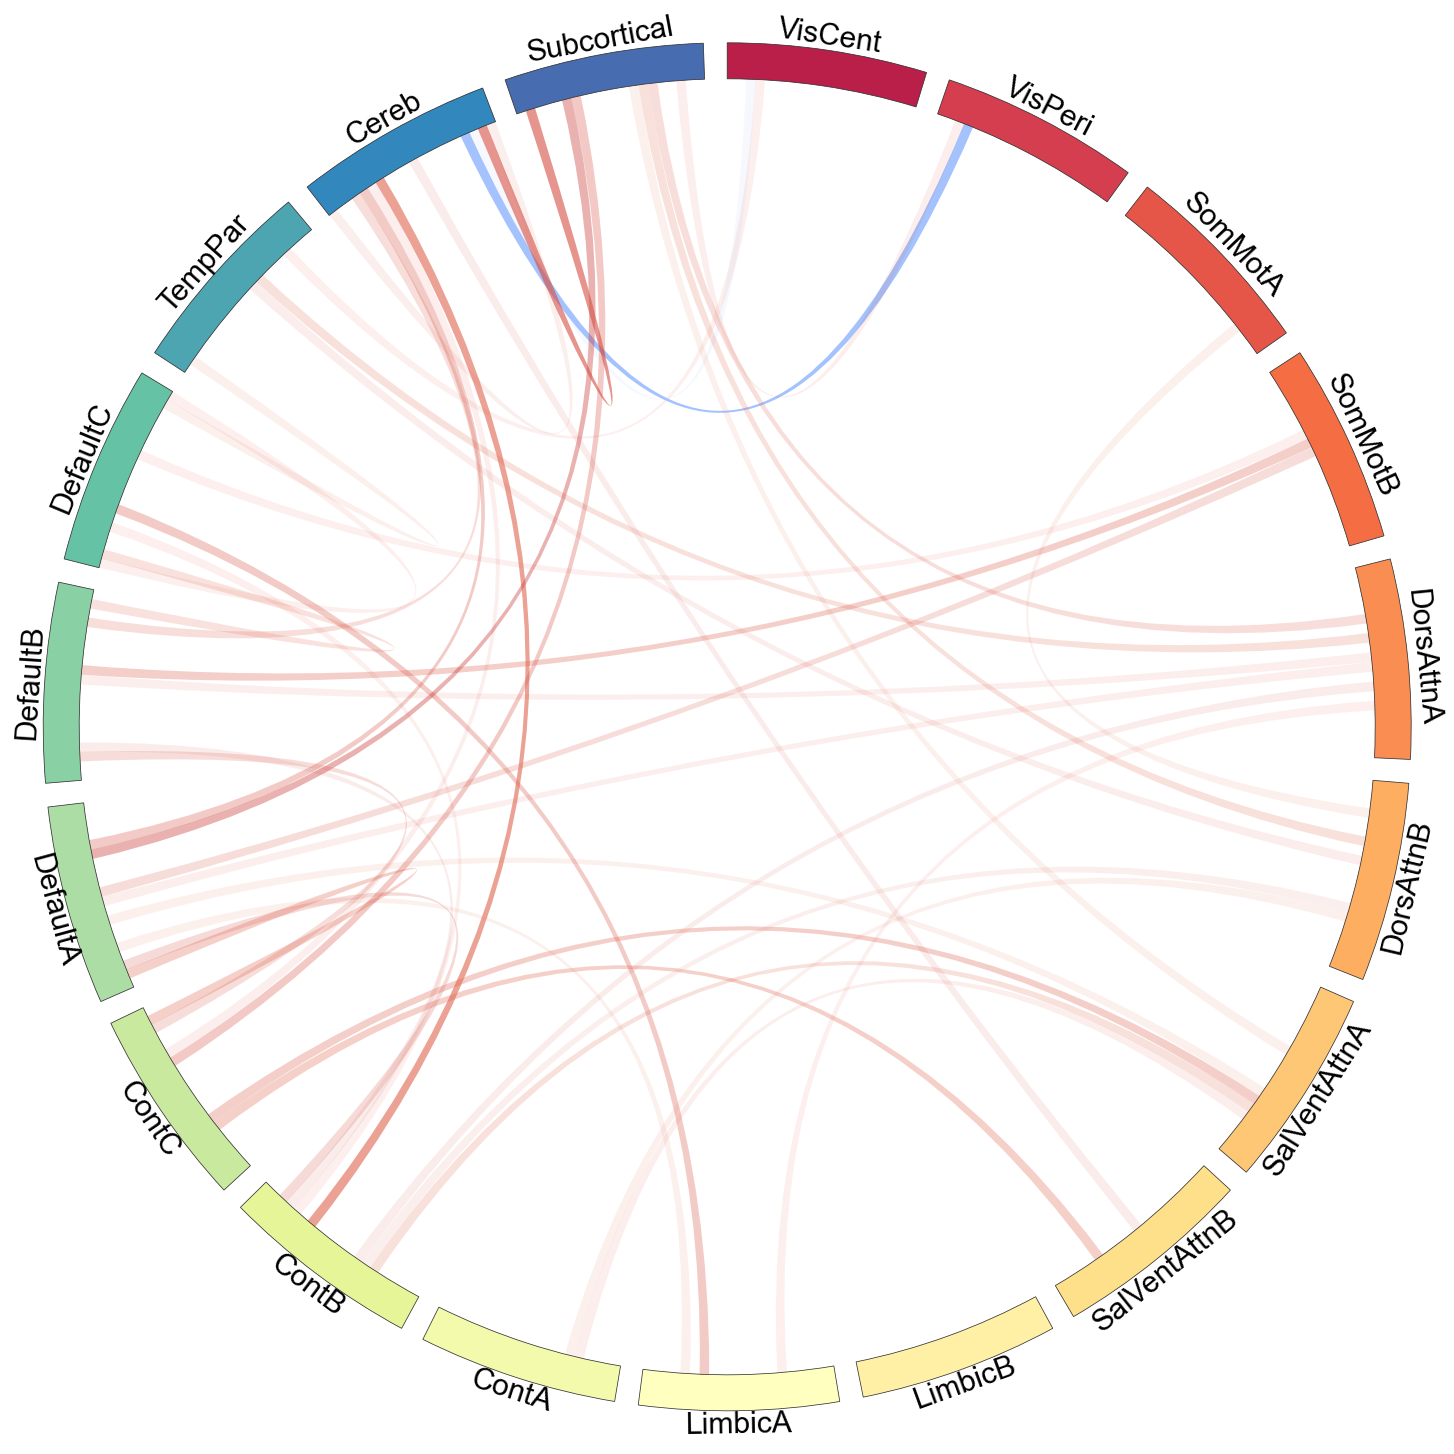

In [23]:

importlib.reload(vpp)

#fig = plt.figure(figsize = (5, 5), frameon=False)

vpp.plot_circus(overlap, atlas_labels, figsize = (20, 20), net_visualize = True)

plt.savefig(op.join(path_to_results, results_study, f'Overlap_{study_to_check[0]}-{study_to_check[1]}-ImgBSR_Circ{perc_thresh}.png'))
#plt.savefig(f'{path_to_results}/Overlap_wModerate-ImgBSR_Circ{mythresh}.png')
#plt.savefig('G:\Mon Drive\_Work\HUG\Data\Results\Emo_PLSC\Emo_BP_Rerus-ImgBSR_Circ4.png')


In [11]:
importlib.reload(vpp)

networks = vpp.get_sep_lines(atlas_labels)

#circus_data = vpp.get_circus_data(to_plot, atlas_labels, networks, net_visualize=True)
circus_data = vpp.get_circus_data(-to_circus, atlas_labels, networks, net_visualize=True)


TypeError: get_circus_data() got multiple values for argument 'net_visualize'

In [89]:
circus_data

,net_from,net_to,alpha,strength,id_from_start,id_to_start
0,VisCent,VisCent,0.0,0.000000,0,19
1,VisCent,VisPeri,0.0,0.000000,18,1
2,VisCent,SomMotA,0.0,0.000000,17,2
3,VisCent,SomMotB,0.0,0.000000,16,3
4,VisCent,DorsAttnA,0.0,0.000000,15,4
...,...,...,...,...,...,...
185,TempPar,Cereb,1.0,16.057855,18,1
186,TempPar,BG,2.0,9.641905,17,2
187,Cereb,Cereb,1.0,9.566753,0,19
188,Cereb,BG,9.0,14.266842,18,1


<AxesSubplot:ylabel='Frequency'>

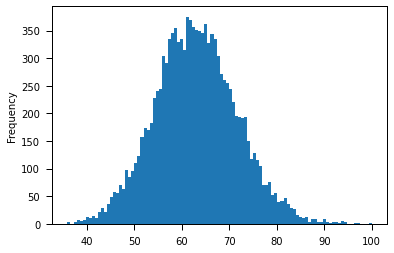

In [7]:
circus_data.strength.plot.hist(bins = 100)

In [20]:
net_from, net_to = [], []

for i, row in networks.iteritems():
    net_to += networks[i:].index.tolist()
    net_from += [i]*len(networks[i:])

id_from, id_to = [], []
for i in range(19):
    id_from.append(0)
    id_from += np.arange(18, i, -1).tolist()

    id_to.append(19)
    id_to += (np.arange(18-i)+1).tolist()

np.array([net_from, net_to, id_from, id_to]).T
circus_by_net = pd.DataFrame(np.array([net_from, net_to, id_from, id_to]).T,
                columns = ["net_from", "net_to", "id_from_start", "id_to_start"])

circus_by_net.merge(circus_data.loc[:, ['net_from', 'net_to', 'strength']], left_on=['net_from', 'net_to'],
                    right_on=['net_from', 'net_to'])


,net_from,net_to,id_from_start,id_to_start,strength
0,VisCent,VisCent,0,19,21
1,VisCent,VisPeri,18,1,42
2,VisCent,SomMotA,17,2,42
3,VisCent,SomMotB,16,3,56
4,VisCent,DorsAttnA,15,4,42
...,...,...,...,...,...
185,TempPar,Cereb,18,1,136
186,TempPar,BG,17,2,88
187,Cereb,Cereb,0,19,561
188,Cereb,BG,18,1,748


c:\Users\cioncaa\Miniconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\cioncaa\Miniconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


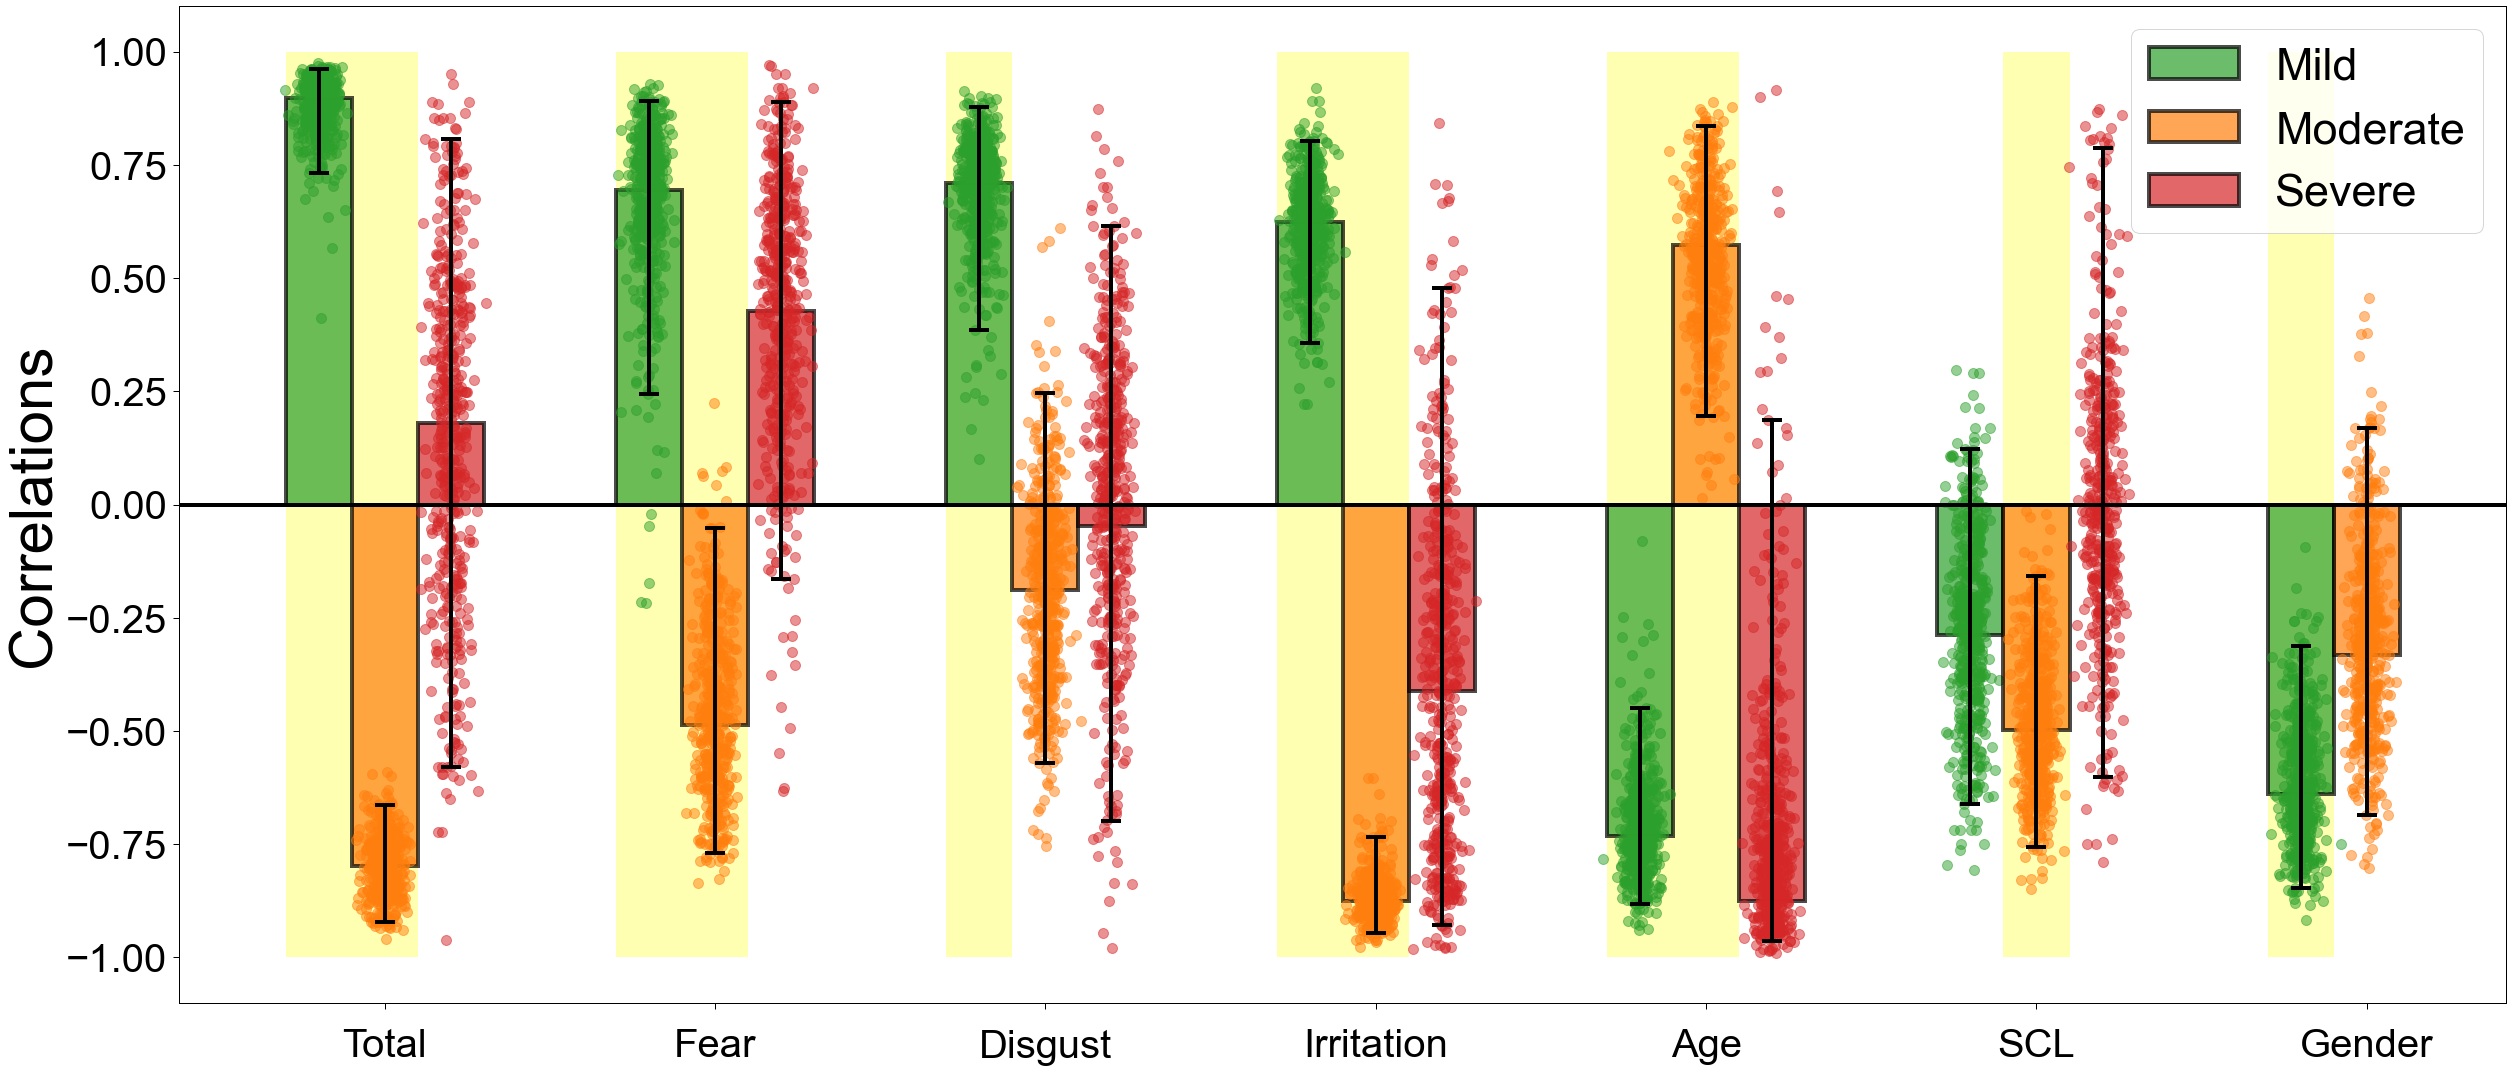

In [10]:
importlib.reload(vpp)

#path_to_mypls = "/mnt/d/Data/MATLAB/myPLS"
#path_to_results = '/mnt/h/My Drive/_Work/HUG/Data/Results'

path_to_mypls = "D:/cioncaa/Documents/MATLAB/myPLS"
path_to_results = 'G:\Mon Drive\_Work\HUG\Data\Results'

results_study = 'Emo_PLSC'

#vpp.plot_behaviour('Fatigue_BP_Obj_GRP', 'D:\cioncaa\Documents\MATLAB\myPLS', LC_id=1)
#vpp.plot_behaviour('Fatigue_BP_Obj_mac_GRP', '/Users/AlexCionca/Documents/MATLAB/myPLS',
#                    LC_id=1)
#vpp.plot_behaviour('Fatigue_BP_Obj_mac_GRP', '/mnt/d/Data/MATLAB/myPLS',
#                    LC_id=1)
#behav_study = 'Emo-rev_1-wcov3-wmemo1_moderate'
behav_study = 'Emo-rev_1-wcov3_GRP'
#behav_study = 'Awareness-SAD-FIN-nolfa-occ'

imaging = False

#plsc_groups = ['Moderate']#, 'Moderate', 'Severe']
#plsc_colors = ['tab:orange']
plsc_groups = ['Mild', 'Moderate', 'Severe']
plsc_colors = ['tab:green', 'tab:orange', 'tab:red']

#plsc_labels = ['TNFa', 'IL 6', 'IL 8', 'IL 1 Ra', 'IL 1 beta', 'IFN gamma', 'GCSF', 'GM CSF', 'Age', 'Gender']
#plsc_labels = [f'SAD {feat}' for feat in ['Memory', 'Fatigue', 'Working Mem.', 'Inhib.', 'Flexi.']]
#plsc_labels = ['Total', 'Fear', 'Disgust', 'Irritation', 'Episodic mem.', 'Age', 'SCL', 'Gender']
plsc_labels = ['Total', 'Fear', 'Disgust', 'Irritation', 'Age', 'SCL', 'Gender']

#if len(plsc_groups) > 1:
#    plsc_labels = ['-'.join([lab, grp]) for lab in plsc_labels for grp in plsc_groups]
save_suffix = 'Behav'

if imaging:
    plsc_labels = [f'CAP {i+1} occ.' for i in range(5)]
    save_suffix = 'Img'

vpp.plot_behaviour(behav_study, path_to_mypls, LC_id = 0, labels = plsc_labels, groups = plsc_groups, colors = plsc_colors, figsize = (35, 15), imaging=imaging)
#vpp.plot_behaviour(behav_study, path_to_mypls, LC_id = 0, labels = ['Total', 'Disgust', 'Fear', 'Irritation'], groups = ['Moderate'], colors = ['tab:orange'])

plt.savefig(op.join(path_to_results, results_study, f'{behav_study}-{save_suffix}Loadings.png'), dpi = 300)
#plt.savefig(f'{path_to_results}/{behav_study}-{save_suffix}Loadings.png', dpi = 300)
#plt.savefig('/mnt/h/My Drive/_Work/HUG/Data/Results/Fatigue_PLSC/Fatigue_BP_Obj_mac_GRP-BehavLoadings.png')
#plt.savefig('G:\Mon Drive\_Work\HUG\Data\Results\Emo_PLSC\Emo_BP_Rerun_GRP-BehavLoadings.png')